In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [200]:
%%time
#df_raw = pd.read_excel("local_data/raw_data_cms_3_teste_source.xlsx", "raw_data_cms_2")
df_raw = pd.read_csv(
    "local_data/raw_data_cms_3_teste_cleaned.csv", 
    dtype={
        'amigo contextualizada':str, 
        'atalhos':str,
        'intencao contextualizada':str,
        'relacionamentos':str,
        'texto_botao_contextualizada':str,
        'titulo_atalhos':str
    }
)
print(f"Raw shape: {df_raw.shape}")
print("Raw sample:")
df_raw.sample(5)

Raw shape: (39796, 465)
Raw sample:
CPU times: total: 2.17 s
Wall time: 2.93 s


,id,amigo contextualizada,assunto,atalhos,canal,chave,created_at,created_by,faqs relacionadas,id vignette,...,Unnamed: 455,Unnamed: 456,Unnamed: 457,Unnamed: 458,Unnamed: 459,Unnamed: 460,Unnamed: 461,Unnamed: 462,Unnamed: 463,Unnamed: 464
15779,15779,NaN,Detran SP,NaN,NaN,,2021-05-14 18:38:17.723000+00:00,blt2db73e8283c60439,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37175,37175,NaN,iToken,[],NaN,NaN,2023-03-14 15:53:25.222000+00:00,blt6e5ece5719920cc3,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11319,11319,NaN,Cheques,NaN,NaN,NaN,2021-10-22 21:38:10.566000+00:00,blt2d1fda930d804526,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39218,39218,NaN,contrato de conta pagamento,NaN,NaN,NaN,2022-11-09 15:23:08.905000+00:00,blt43949dc9b5ef8f15,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34800,34800,NaN,Boletos,NaN,NaN,,2021-05-14 16:23:25.685000+00:00,blt2db73e8283c60439,[],4226dda4ab984610VgnVCM1000009c3e3a0a____,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
columns = df_raw.columns[:35]

In [133]:
col_idx = 0

In [134]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 0: id

In [135]:
df_col_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
#df_col_freq[df_col_freq['count']>1]
print(f"Values of column {col_nm} that are not numeric and occurs only once")
print(df_col_freq[(df_col_freq['count']==1)&(~df_col_freq[col_nm].astype(str).str.isnumeric())])
print()
print(f"Indexes and values of column {col_nm} that are not numeric")
df_err = df_raw.loc[~df_raw[col_nm].astype(str).str.isnumeric(),col_nm]
print(f"Errors found: {df_err.shape[0]}")
df_err

Values of column id that are not numeric and occurs only once
Empty DataFrame
Columns: [id, count]
Index: []

Indexes and values of column id that are not numeric
Errors found: 0


Series([], Name: id, dtype: int64)

## Example of an error in column 1

![](local_data/data_quality_issues.png "Example of data quality issues")

In [136]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 1: amigo contextualizada

In [137]:
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

,amigo contextualizada,count
0,cc1318f2-13ed-11e7-bd57-3307fe5296e4,452
1,81139d1d-aaa8-404d-9a0f-f4fee375a64a,204
2,eff55cf2-5e00-7d92-fa98-5fdb570b8319,64
3,6d908690-5004-9ebd-f939-d8295c2e6b3c,48
4,8d4b11ef-9a34-11e7-a9b4-7a4a71f757c3,16


In [138]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 2: assunto

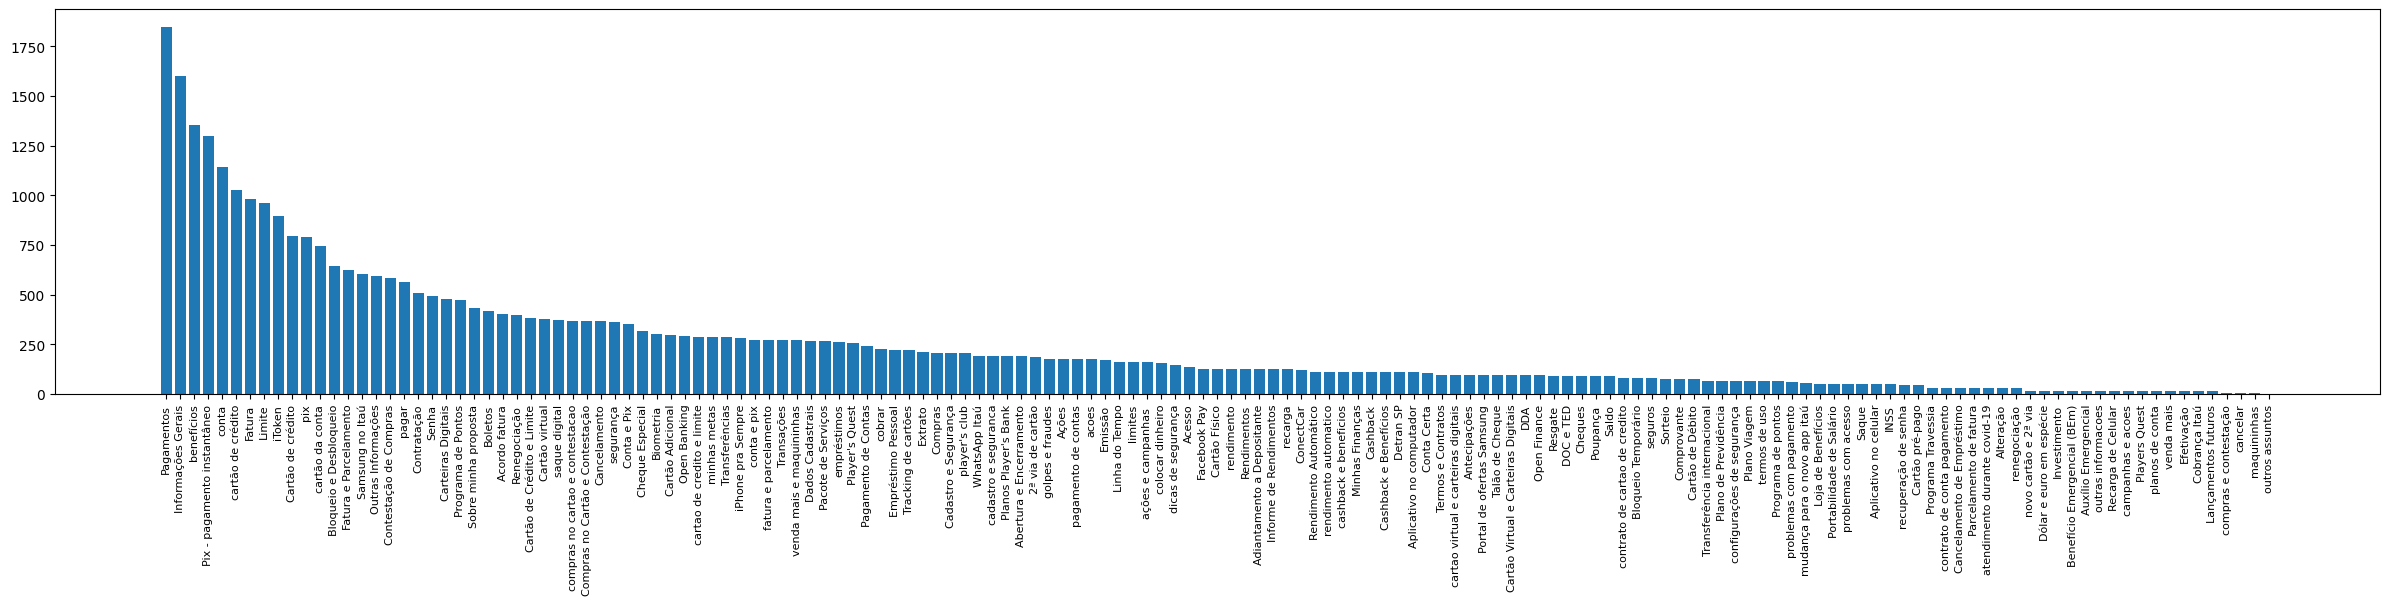

In [139]:
df_values = df_raw[col_nm].value_counts()
plt.figure(figsize=(30,5))
plt.bar(x=df_values.index,height=df_values.values)
plt.xticks(rotation=90, fontsize=8)
pass


## Highlights
* Can we use `assunto` to filter all the QnA related to *Cartâo da crédito*?

In [140]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 3: atalhos

In [141]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 75.89%

,count
atalhos,
[],8848
"[{'uid': 'blt9c7ea789646917e1', '_content_type_uid': 'atalhos_ca_atlas'}]",112
"[{'uid': 'blt1cb0de381c4d6f48', '_content_type_uid': 'atalhos_ca_atlas'}]",80
"[{'uid': 'blted65536d84c19fca', '_content_type_uid': 'atalhos_ca_atlas'}]",80
"[{'uid': 'bltfc8cdb0bcc6cf78d', '_content_type_uid': 'atalhos_ca_atlas'}]",64
"[{'uid': 'bltcab0a51024942c8a', '_content_type_uid': 'atalhos_ca_atlas'}]",48
"[{'uid': 'blt177fa8d21bd562c3', '_content_type_uid': 'atalhos_ca_atlas'}]",48
"[{'uid': 'blt3660329492b71226', '_content_type_uid': 'atalhos_ca_atlas'}]",46
"[{'uid': 'blt23786df1e089ac20', '_content_type_uid': 'atalhos_ca_atlas'}]",32


In [142]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 4: canal

In [143]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 97.60%

,count
canal,
537fb21b-3da3-4295-b99d-92d6227b2188,955


In [144]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 5: chave

In [145]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 60.62%

,count
chave,
,14836
cartao_credito,677
conta_corrente,16
cashback;,16
cancelar;excluir;cancelamento;canc;,16
cancelar;canc;cancelamento;cartao;cartão;quero;cancel;cancelar;cancelamento;cartao;cartão;,16
cancelamento; cancelar;,16
samsung;sansumg;samsungpay;pay;,16
NET_NEW_EMPRESTIMO,16


In [146]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 6: created_at

## Percentage of nulls 60.62%

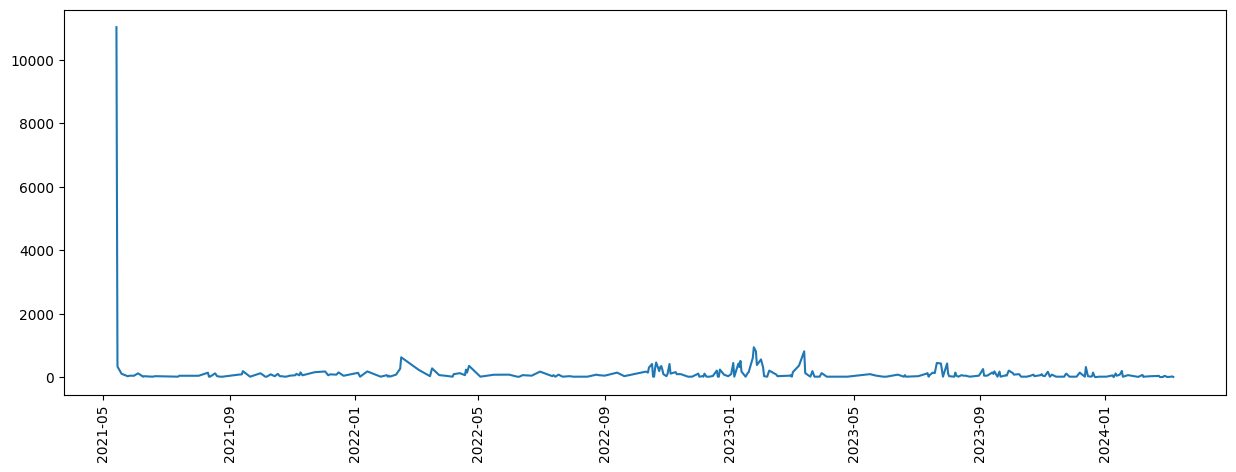

In [147]:
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].str[:10]).dt.date
df_date_freq = df_time_freq.groupby('date').sum('count')
plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

In [148]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 7: created_by

In [149]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
created_by,
blt43949dc9b5ef8f15,11648
blt2db73e8283c60439,11038
bltd75c6b984fa6718a,2701
blt2d1fda930d804526,1568
bltc73d2b6ddc340f5e,1481
bltd497be6c16d95e78,1107
bltba2205a2253a3d3e,1074
blt397cfef5a3267435,1008
blt6e5ece5719920cc3,974


In [150]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 8: faqs relacionadas

In [151]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
faqs relacionadas,
[],39620
"[{'uid': 'bltf7c13ec6ef28f358', '_content_type_uid': 'faq_mobile'}, {'uid': 'bltf06532869fa4c38e', '_content_type_uid': 'faq_mobile'}]",16
"[{'uid': 'bltf7c13ec6ef28f358', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt62ecbca423a5a8e0', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt91524d7402640131', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt66ae64cf963fa8ae', '_content_type_uid': 'faq_mobile'}]",16
"[{'uid': 'bltf06532869fa4c38e', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt909c5e8ef68f157a', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt366d4f37df23fa7b', '_content_type_uid': 'faq_mobile'}, {'uid': 'blta74b8a06920ac2e3', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt0fe745980e40780a', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt62ecbca423a5a8e0', '_content_type_uid': 'faq_mobile'}, {'uid': 'bltbfbbd21cc372d89e', '_content_type_uid': 'faq_mobile'}]",16
"[{'uid': 'blt62ecbca423a5a8e0', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt366d4f37df23fa7b', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt23c43c80d0f4952d', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt91524d7402640131', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt66ae64cf963fa8ae', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt0fe745980e40780a', '_content_type_uid': 'faq_mobile'}]",16
"[{'uid': 'blt62ecbca423a5a8e0', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt366d4f37df23fa7b', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt91524d7402640131', '_content_type_uid': 'faq_mobile'}, {'uid': 'bltbfbbd21cc372d89e', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt66ae64cf963fa8ae', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt909c5e8ef68f157a', '_content_type_uid': 'faq_mobile'}]",16
"[{'uid': 'blt909c5e8ef68f157a', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt3def68746dd59293', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt8e34ed22367060df', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt195f84befd9c1fb6', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt74f4156fbe8691b4', '_content_type_uid': 'faq_mobile'}, {'uid': 'bltbff31660497f8d43', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt53a27d143b179e3d', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt20b5028cd497b8a3', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt62ecbca423a5a8e0', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt366d4f37df23fa7b', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt91524d7402640131', '_content_type_uid': 'faq_mobile'}]",16
"[{'uid': 'blt38000e7331c44987', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt91524d7402640131', '_content_type_uid': 'faq_mobile'}, {'uid': 'bltf7c13ec6ef28f358', '_content_type_uid': 'faq_mobile'}, {'uid': 'bltf06532869fa4c38e', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt909c5e8ef68f157a', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt366d4f37df23fa7b', '_content_type_uid': 'faq_mobile'}]",16
"[{'uid': 'bltf7c13ec6ef28f358', '_content_type_uid': 'faq_mobile'}, {'uid': 'bltf06532869fa4c38e', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt909c5e8ef68f157a', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt366d4f37df23fa7b', '_content_type_uid': 'faq_mobile'}, {'uid': 'blt62ecbca423a5a8e0', '_content_type_uid': 'faq_mobile'}]",16


In [152]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 9: id vignette

In [153]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 80.10%

,count
id vignette,
552404ef5e506710VgnVCM1000009c3e3a0a____,331
4c5b9efc995e1710VgnVCM1000009c3e3a0a____,239
48cd08b5a52b5710VgnVCM1000009c3e3a0a____,96
388d685f942c7610VgnVCM1000009c3e3a0a____,80
c08192fa525d4710VgnVCM2000009d3e3a0a____,79
...,...
97de85145b526710VgnVCM1000009c3e3a0a____,13
eb70b4b5e6dde510VgnVCM1000009c3e3a0a____,11
36fbb9f2b161f510VgnVCM1000009c3e3a0a____,5


In [154]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 10: intencao contextualizada

In [155]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 98.03%

,count
intencao contextualizada,
"#Oi, quero consultar meu título de capitalização",32
"#Oi, quero antecipar as parcelas do meu empréstimo",32
"#Oi, preciso recuperar uma senha.",32
"#Oi, Quero consultar meu pacote de serviços!",32
"#oi, quero bloquear meu cartão de crédito",24
#simular avaliação emergencial de crédito,20
"#Oi, quero cancelar meu adiantamento a depositante",16
"#Oi, quero a 2ª via do boleto de consórcio",16
"#Oi, preciso da 2 via do cartão de debito",16


In [157]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 11: menus

In [158]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 60.86%

,count
menus,
,15559
SPA/tributos,16


In [159]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 12: palavras chave

In [160]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 69.73%

,count
palavras chave,
débitoautomático/debitoautomatico;debito aumentatico;,160
carteiras digitais;carteiras;carteira;carteira digital;apple pay;apple;samsung pay;samsung;google pay;google;wallet;pagar por aproximação;aproximação;nfc;carteirasdigitais;carteiradigital;applepay;samsungpay;googlepay;pagarporaproximação;aproximacao;,144
contest;contestar;contestação;contestacao;contestarcompras;contestarcomp;compranegada;compraneg;problemascomacompra;compraprobl;problemacompra;,144
segunda via;cartão digital;carteira digital;cardless;via digital;,142
máquina;maquina;maquininha;rede;maquineta;agenda;recebível;recebivel;recebiveis;credito;antecipar;anteci;,112
...,...
parcelamento da fatura; fatura; renegociar cartão; parcelar cartão;,1
apple pay; samsung pay; google pay; carteira digital; pagamento com celular; cartão no celular; celular; cartão,1
carteira digital; apple pay; google pay; samsung pay,1


In [161]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 13: pergunta

In [162]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 0.00%

,pergunta,count
0,Como faço para cancelar meu cartão?,128
1,Como faço para gerar um cartão virtual?,96
2,Onde consulto o código de barras da fatura?,96
3,Recebi um aumento temporário de limite. O que ...,93
4,O que acontece depois da contestação?,80
...,...,...
2103,O que fazer quando não pedi um cartão adiciona...,1
2104,"Se eu gerar um cartão de crédito virtual, o ca...",1
2105,Onde acompanho a entrega do meu cartão de créd...,1
2106,Posso gerar um cartão virtual mesmo sem ter um...,1


In [163]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 14: pergunta chave

In [164]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 60.86%

,pergunta chave,count
0,,14926
1,anuidade,47
2,fatura fechada,47
3,aumentar limite do cartão,32
4,avaliação emergencial de crédito,32
5,cadastrar fatura digital,32
6,consultar limite,32
7,confirmação de compra,32
8,atualizar dados cadastrais,32
9,desbloquear cartão,31


In [165]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 15: portal

In [166]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 0.00%

,portal,count
0,mobile,33635
1,tokpag,6161


In [167]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 16: produto

## Percentage of nulls 0.00%

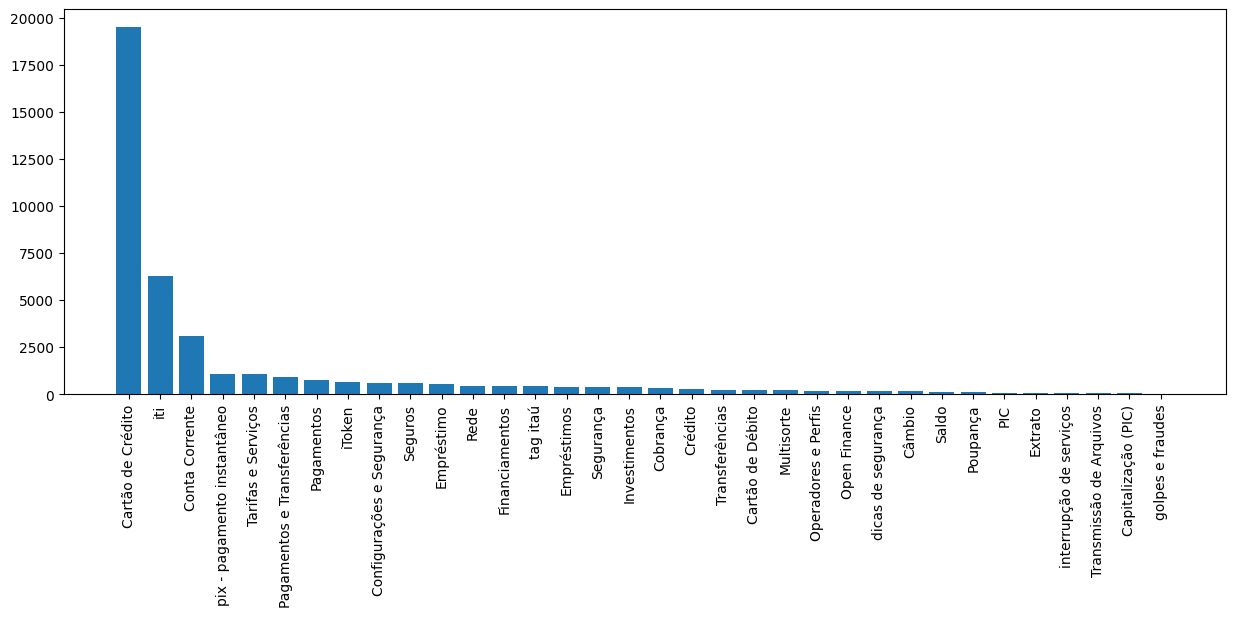

In [170]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_values = df_raw[col_nm].value_counts()
plt.figure(figsize=(15,5))
plt.bar(x=df_values.index,height=df_values.values)
plt.xticks(rotation=90)#, fontsize=8)
pass

## Hightlights
* Can we use `produto` to filter all QnA related to *Cartâo de Crédito*?

In [171]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 17: relacionamentos

In [174]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 77.46%

,count
relacionamentos,
[],8834
"[{'uid': 'blt712e4fe01211055f', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt12d404c243787112', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt70dea5049f79f495', '_content_type_uid': 'relacionamentos_cliente'}]",94
"[{'uid': 'blt70dea5049f79f495', '_content_type_uid': 'relacionamentos_cliente'}]",35
"[{'uid': 'blt12d404c243787112', '_content_type_uid': 'relacionamentos_cliente'}]",3
"[{'uid': 'blt70dea5049f79f495', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt12d404c243787112', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt712e4fe01211055f', '_content_type_uid': 'relacionamentos_cliente'}]",2
"[{'uid': 'blt12d404c243787112', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt712e4fe01211055f', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt70dea5049f79f495', '_content_type_uid': 'relacionamentos_cliente'}]",1
"[{'uid': 'blt712e4fe01211055f', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt70dea5049f79f495', '_content_type_uid': 'relacionamentos_cliente'}, {'uid': 'blt12d404c243787112', '_content_type_uid': 'relacionamentos_cliente'}]",1


In [176]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 18: resposta

In [177]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 0.00%

,resposta,count
0,É o valor mínimo a ser pago para que a fatura ...,64
1,"Ligue para a nossa central de atendimento, no ...",60
2,"<p>Sim, pode! Pra fazer isso, é só tocar em ""<...",48
3,"<p>Se você quiser alterar dados como endereço,...",48
4,"Depois de habilitar o iToken, você pode acessa...",45
...,...,...
2651,<p>Pode! O retorno sobre a sua proposta é imed...,1
2652,"<p>Pode sim! Se o seu cartão é novo, você prec...",1
2653,<p>Você pode ter informações sobre o status do...,1
2654,<p>Você pode acompanhar a entrega do seu cartã...,1


In [178]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 19: resposta_caixa

In [179]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 60.86%

,resposta_caixa,count
0,,15559
1,Você pode alterá-la em qualquer caixa eletrôni...,16


In [180]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 20: resposta computador

In [181]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 60.86%

,resposta computador,count
0,,15543
1,amortização;amortizacao;amortizar;amortiza;amo...,16
2,Você acessa a sua conta no Itaú na internet pe...,16


In [182]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 21: resposta_telefone

In [183]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 61.13%

,resposta_telefone,count
0,,15141
1,3003-3030 (capitais e regiões metropolitanas)\...,139
2,3003-3030 (capitais e regiões metropolitanas)\...,47
3,Basta ligar para: 4090-1100 (capitais e regiõe...,32
4,Você pode ligar para: 3003-3030,31
5,Basta ligar para: 3003-3030 (capitais e regiõe...,31
6,Basta ligar para: 3003 3030 (capitais e regiõe...,16
7,Basta ligar para: 3003-3030 (capitais e regiõe...,16
8,2a via;segunda via;atualizar;novo boleto;,15


In [184]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 22: rota

In [185]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 60.86%

,rota,count
0,,15575


In [186]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 23: segmento

In [188]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
segmento,
['playersbank'],6384
"['PF', 'PJ']",3272
"['PJ', 'PF']",2757
"['VAREJO', 'UNICLA', 'PERSON']",2240
"['EMPPLU', 'EMP2', 'EMP3', 'EMP4']",1772
...,...
"['VAREJO', 'UNICLA', 'PERSON', 'PAGAMENTO', 'SEM_SEGMENTO']",3
"['cartaoluiza', 'Itaucard', 'Credicard', 'Hipercard']",2
"['VAREJO', 'UNICLA', 'PERSON', 'PRIVCO', 'Itaucard', 'Credicard', 'Hipercard', 'cartaoluiza', 'SEM_SEGMENTO']",1


## Hightlights

* What does `segmento` means?
* Do we need to take it into account?

In [189]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 24: tags

In [190]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
tags,
[],37734
['idl'],432
['rascunho'],258
"['cartão digital', 'segunda via', '2ª via digital']",158
['openfinance'],128
['facebook pay'],128
"['rendimento', 'iti']",80
"['senha', 'segurança']",79
['crise'],60


In [191]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 25: texto_botao_contextualizada

In [192]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 98.03%

,count
texto_botao_contextualizada,
bloquear cartão,36
saber mais,32
2ª via do boleto,32
antecipar parcela,32
quero habilitar,32
rastrear entrega,32
consultar pelo chat,32
recuperar senha,32
alterar pacote,32


In [194]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 26: title

In [195]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
title,
[Crediicard On/Samsung/PlayersBank/Decathlon] Paguei a fatura duas vezes ou um valor a mais. E agora?,32
Como cadastro minha fatura em débito automático? c6ee8436,16
[PlayersBank] Quanto vou receber de cashback?,16
[Players Bank] Como faço para alterar a senha do meu app?,16
[Players Bank] Como faço para cancelar meu cartão?,16
...,...
[PF] [Benefícios] Tenho benefícios de compras com o cartão The One?,1
[PF] [Benefícios] Como funciona o serviço da Flapper para clientes The One?,1
[PF] [Benefícios] Como funciona o benefício de transportes do Cartão The One?,1


## Hightlights
* Can we use `title` to filter the QnA related to benefits?

In [196]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 27: titularidade

In [197]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
titularidade,
---,22694
T,17055
A,47


In [198]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 28: titulo_atalhos

In [199]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 75.89%

,count
titulo_atalhos,
[],8849
"[{'uid': 'bltf6fc33db0080d867', '_content_type_uid': 'titulos_ca_atlas'}]",745


In [201]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 29: top

In [202]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
top,
---,38816
X,980


In [203]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 30: uid

In [204]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
uid,
bltc45bbb6c632af545,16
bltc06bb7279e33325e,16
bltf23b3bf924a2400d,16
bltf10485df8943234c,16
blt3ca00a120a021e71,16
...,...
blt6a210e505dc6c2e3,1
blta6ec2f8f64c35091,1
bltd211cd915002d7e2,1


In [205]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 31: updated_at

## Percentage of nulls 0.00%

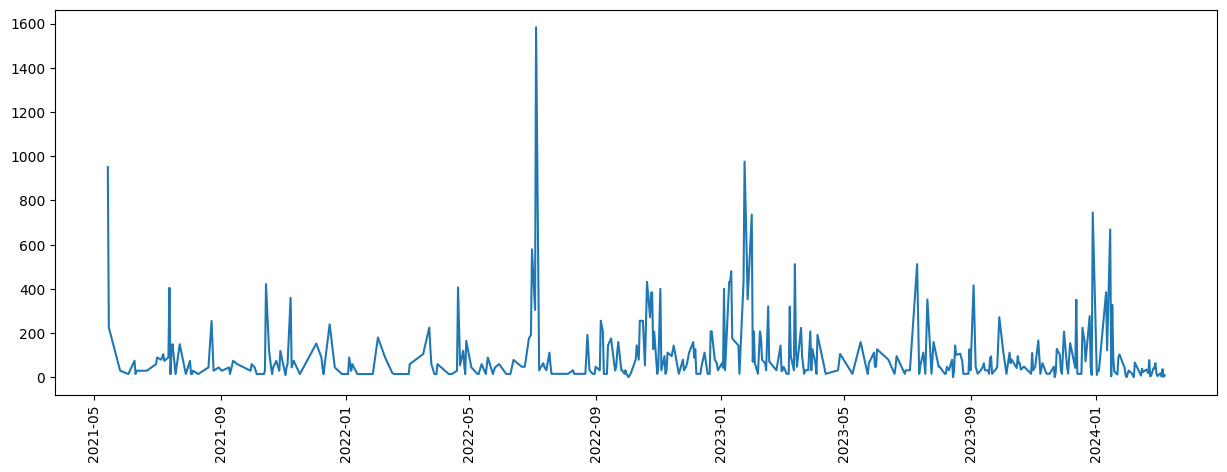

In [206]:
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].str[:10]).dt.date
df_date_freq = df_time_freq.groupby('date').sum('count')
plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

In [207]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 32: updated_by

In [208]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
updated_by,
blt43949dc9b5ef8f15,14864
bltd75c6b984fa6718a,3900
blt12345ce8145dba43,3562
blt2d1fda930d804526,2469
bltc73d2b6ddc340f5e,1464
blt643c073ebc5f7a2e,1342
blt397cfef5a3267435,1207
blt9331085030cf37d6,1174
blta65848e67b47489f,1131


In [209]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 33: ingestion_timestamp

## Percentage of nulls 0.00%

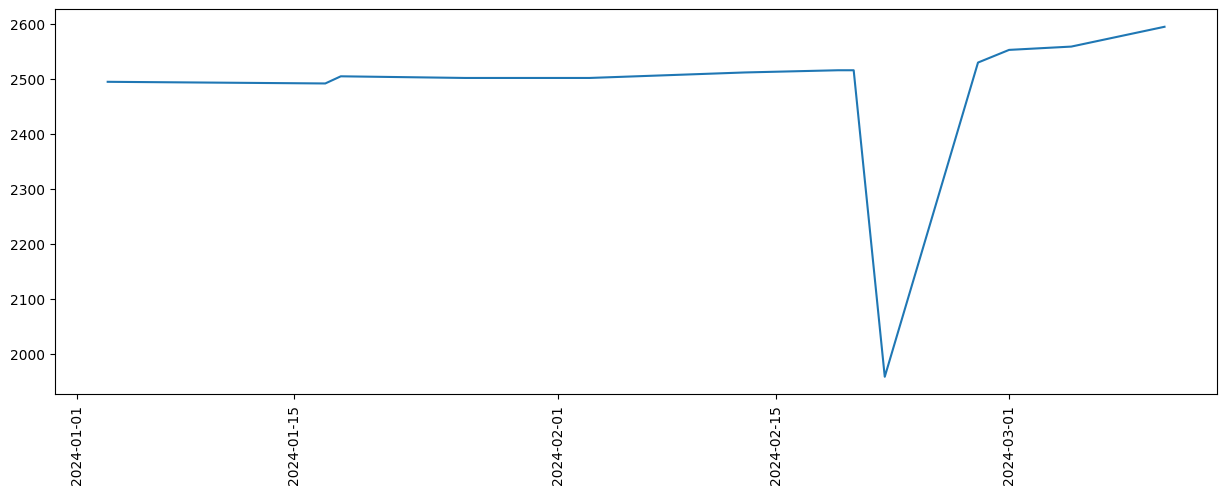

In [210]:
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].str[:10]).dt.date
df_date_freq = df_time_freq.groupby('date').sum('count')
plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

In [211]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 34: anomesdia

## Percentage of nulls 0.00%

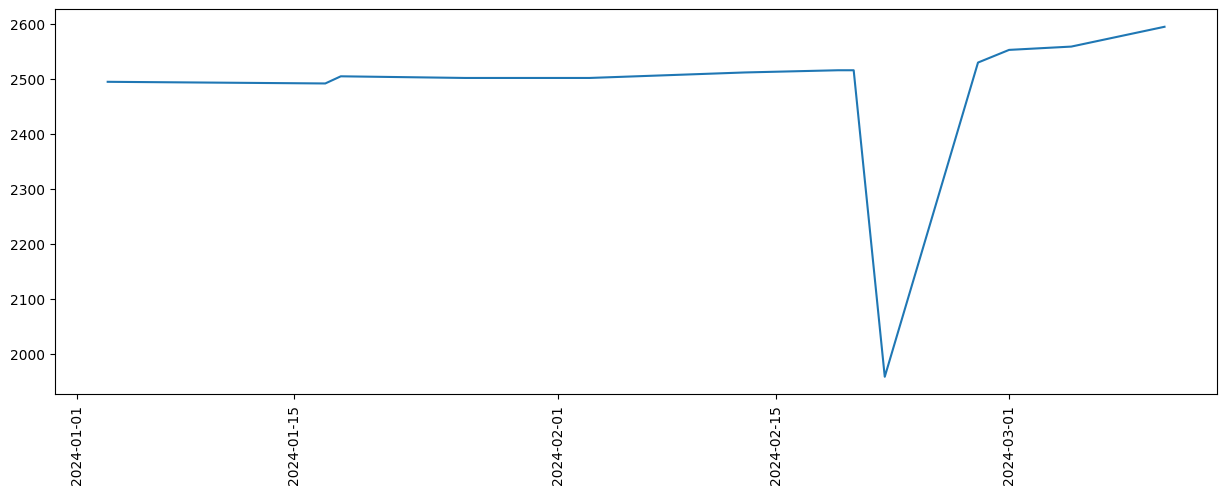

In [226]:
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index().sort_values(col_nm)
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].astype(str)).dt.date
df_date_freq = pd.DataFrame(df_time_freq.groupby('date').sum('count')['count'])
plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

# Next Steps
* Create embeddings to questions and answers
* Clustering analysis to experiment the best way to identify QnAs related to credit card benefits.
* Clustering analysis to discover different answers semantically highly correlated.
* Clustering analysis to discover different questions semantically highly correlated.
* Analysis to properly relate questions and answers (is a simple similarity rank enough to related Q n A?